In [213]:
import numpy as np
import matplotlib.pyplot as plt

In [214]:
# Parameters
beta = 3
sdim = 256

In [215]:
# Set Seed
np.random.seed(117);

In [216]:
# Build power spectrum 
f = [x/sdim for x in range(1, int(sdim/2)+1)] + [x/sdim for x in range(-int(sdim/2), 0)]
u = np.reshape(f, (sdim, 1))
v = np.reshape(f, (1, sdim))
w = np.reshape(f, (sdim, 1, 1))
powerspectrum = (u**2 + v**2 + w**2)**(-beta/2)

In [217]:
# Noise and ifft
phases = np.random.normal(0, 255, size=[sdim, sdim, sdim]);
complexpattern = np.fft.ifftn(powerspectrum**0.5 * (np.cos(2*np.pi*phases)+1j*np.sin(2*np.pi*phases)))

In [218]:
# Normalize result
realpattern = np.real(complexpattern)
realpattern = (realpattern-np.amin(realpattern))/np.amax(realpattern-np.amin(realpattern))

In [219]:
np.max(realpattern)

1.0

In [220]:
# Binarize result for box counting
threshold, upper, lower = 0.5, 1, 0
realpattern = np.asarray(np.where(realpattern>threshold, upper, lower))

In [221]:
# Create vectors for 3d plot
#z, x, y = np.where(realpattern>= 0)
#color = realpattern.flatten()
#color = color[:]

In [222]:
# Display 3d Fractal
#fig = plt.figure()
#plt.rcParams["figure.figsize"]=10,10
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z, c=color, alpha=1)
#plt.show()

In [242]:
def fractal_dimension_3d(Z, threshold=0.9):

    # Only for 3d volume
    assert(len(Z.shape) == 3)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):

        reducer = np.add.reduceat(np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0), np.arange(0, Z.shape[1], k), axis=1)

        S = np.add.reduceat(reducer, np.arange(0, Z.shape[2], k), axis=2)
        #print(S.shape)
        
        # We count non-empty (0) and non-full boxes (k*k) (is this right for 3d?)
        return len(np.where((S > 0) & (S < k*k*k))[0])

    # Transform Z into a binary array
    #Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n-1, 0, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        #print(size)
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    m, b = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -m, b, sizes, counts

def fractal_dimension_2d(Z, threshold=0.9):

    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)
        #print(S.shape)
        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])

    # Transform Z into a binary array
    #Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n-1, 0, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        #print(size)
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    m, b = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -m, b, sizes, counts

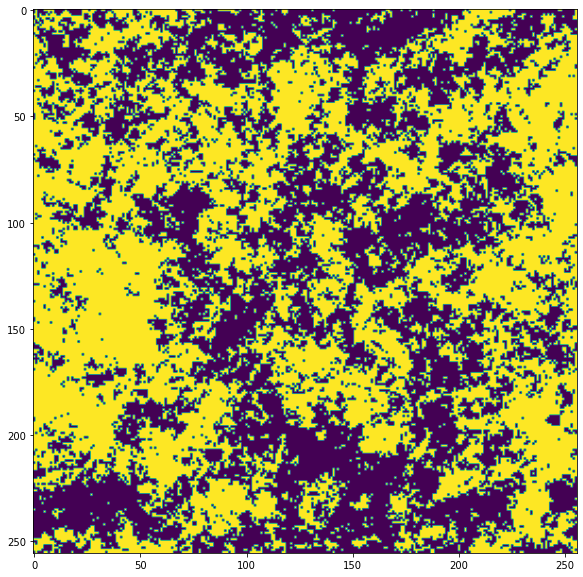

In [224]:
test2d = realpattern[-1,:,:]
plt.imshow(test2d)

In [243]:
fractal_dimension_2d(test2d)

(1.8347969782324272,
 10.463644905915105,
 array([128,  64,  32,  16,   8,   4,   2]),
 [4, 16, 64, 256, 981, 3190, 6743])

In [244]:
fractal_dimension_3d(np.asarray(realpattern))

(2.9079110050867034,
 16.291589825391604,
 array([128,  64,  32,  16,   8,   4,   2]),
 [8, 64, 512, 4096, 32721, 244220, 1212297])

In [245]:
avg2d = []

for i in range(len(realpattern)):
  slope2d, intercept2d, sz2d, count2d = fractal_dimension_2d(realpattern[i,:,:])
  avg2d.append(slope2d)

print(np.mean(avg2d))

1.8351530245266159


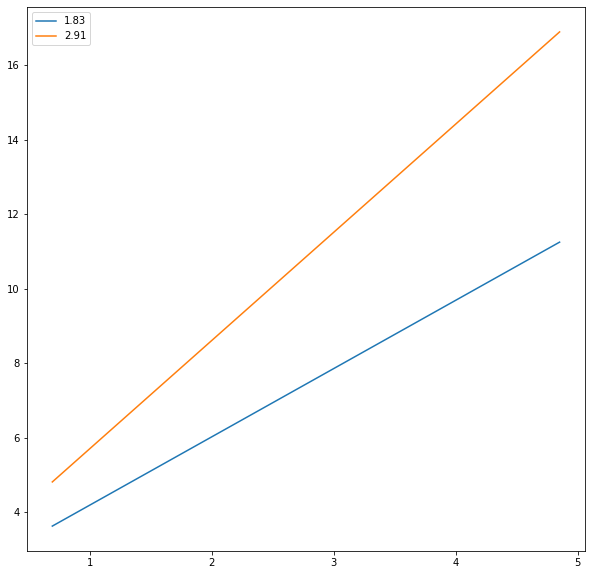

In [247]:
slope2d, intercept2d, sz2d, count2d = fractal_dimension_2d(test2d)
plt.plot(np.log(sz2d), slope2d*np.log(sz2d)+np.log(intercept2d), label=f"{round(slope2d, 2)}")

slope3d, intercept3d, sz3d, count3d = fractal_dimension_3d(np.asarray(realpattern))
plt.plot(np.log(sz3d), slope3d*np.log(sz3d)+np.log(intercept3d), label=f"{round(slope3d, 2)}")
leg = plt.legend()
plt.show()